<a href="https://colab.research.google.com/github/eminshall/QuantFinanceWorkbooks/blob/main/Forecasting_Housing_Prices_with_Meta_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nasdaq-data-link prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import nasdaqdatalink
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

## NASDAQ API KEY

In [ ]:
nasdaqdatalink.ApiConfig.api_key = 'CwY-5k66sGHxnpTUptM-'

## Continue

In [ ]:
df_indicator = nasdaqdatalink.get_table(
    datatable_code='ZILLOW/INDICATORS'
)

In [ ]:
df_indicator

,indicator_id,indicator,category
None,,,
0,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
1,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
2,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
4,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values
5,Z5BR,ZHVI 5+ Bedroom Time Series ($),Home values
6,Z4BR,ZHVI 4-Bedroom Time Series ($),Home values
7,Z3BR,ZHVI 3-Bedroom Time Series ($),Home values
8,Z2BR,ZHVI 2-Bedroom Time Series ($),Home values


In [ ]:
df_region = nasdaqdatalink.get_table(
    datatable_code = 'ZILLOW/REGIONS',
    paginate=True
)

In [ ]:
df_region.loc[df_region['region_type'] == 'metro']

,region_id,region_type,region
None,,,
12247,845172,metro,"Winfield, KS; KS"
12248,845171,metro,"Union, SC; SC"
12249,845170,metro,"Scottsburg, IN; IN"
12251,845169,metro,"Rockport, TX; TX"
12252,845168,metro,"Pearsall, TX; TX"
...,...,...,...
60646,394300,metro,"Ada, OK; OK"
60648,394299,metro,"Abilene, TX; TX"
60649,394298,metro,"Aberdeen, WA; WA"


In [ ]:
df = nasdaqdatalink.get_table(
    datatable_code='ZILLOW/DATA',
    indicator_id='ZSFH',
    region_id='102001',
)

In [ ]:
df.sort_values('date', ascending=True, inplace=True)

df

,indicator_id,region_id,date,value
None,,,,
327,ZSFH,102001,1996-01-31,106752.000000
326,ZSFH,102001,1996-02-29,106784.000000
325,ZSFH,102001,1996-03-31,106839.000000
324,ZSFH,102001,1996-04-30,106974.000000
323,ZSFH,102001,1996-05-31,107126.000000
...,...,...,...,...
4,ZSFH,102001,2022-12-31,328203.601974
3,ZSFH,102001,2023-01-31,332892.362504
2,ZSFH,102001,2023-02-28,337138.265574


In [ ]:
df = df[['date','value']]

In [ ]:
df_plot = df.set_index('date')

<Axes: xlabel='date'>

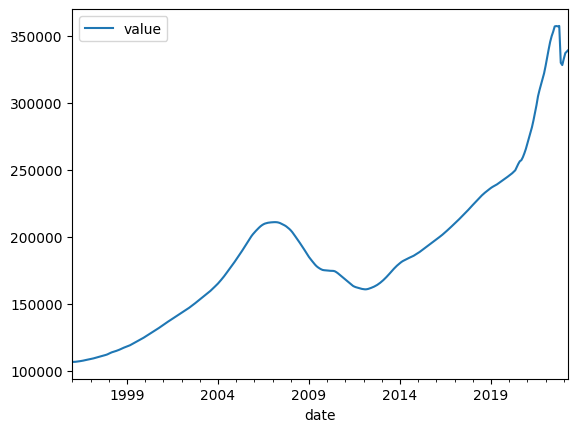

In [ ]:
df_plot.plot()

# Meta Prophet Stuff

In [ ]:
df.columns= ['ds', 'y']

In [ ]:
#Arbitrarily Choose to use the last quarter as test data
train_indices = df['ds'] < '2019-01-01'
df_train = df.loc[train_indices].dropna()
df_test = (
    df.loc[~train_indices].reset_index(drop=True)
)

In [ ]:
df_test

,ds,y
0,2019-01-31,236569.000000
1,2019-02-28,237317.000000
2,2019-03-31,237934.000000
3,2019-04-30,238505.000000
4,2019-05-31,239234.000000
5,2019-06-30,240036.000000
6,2019-07-31,240889.000000
7,2019-08-31,241651.000000
8,2019-09-30,242460.000000
9,2019-10-31,243283.000000


In [ ]:
prophet = Prophet(changepoint_range=0.9)
prophet.add_country_holidays(country_name='US')
prophet.add_seasonality(
    name='monthly',period=30.5,fourier_order=5
)

prophet.fit(df_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp10vmzhpj/4zs25_ga.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp10vmzhpj/6yc5fcc0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27018', 'data', 'file=/tmp/tmp10vmzhpj/4zs25_ga.json', 'init=/tmp/tmp10vmzhpj/6yc5fcc0.json', 'output', 'file=/tmp/tmp10vmzhpj/prophet_modelragm1igg/prophet_model-20230608224742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:47:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:47:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
df_future = prophet.make_future_dataframe(
    periods=len(df_test), freq='M'
)

In [ ]:
df_future

,ds
0,1996-01-31
1,1996-02-29
2,1996-03-31
3,1996-04-30
4,1996-05-31
...,...
323,2022-12-31
324,2023-01-31
325,2023-02-28
326,2023-03-31


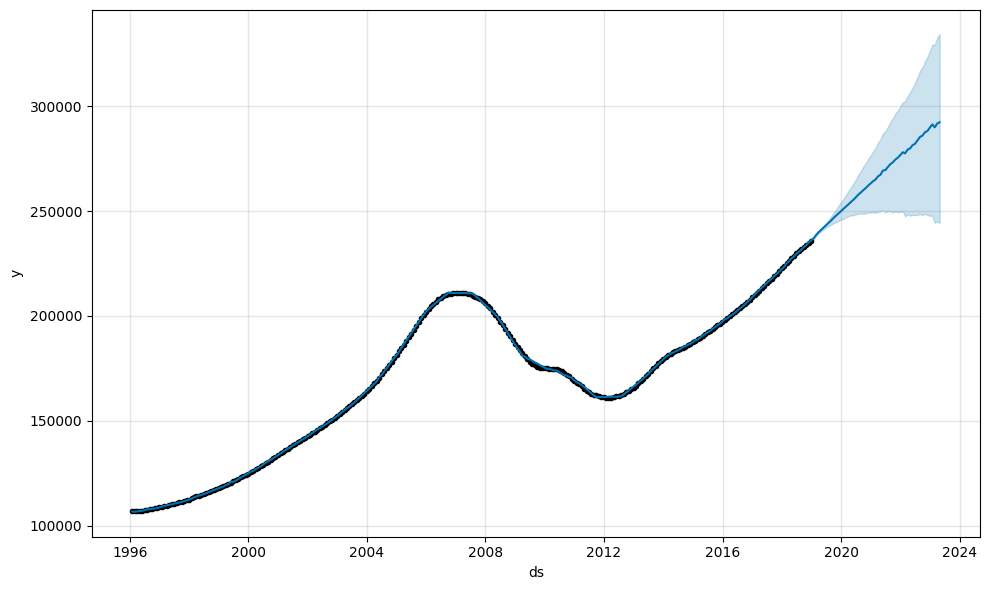

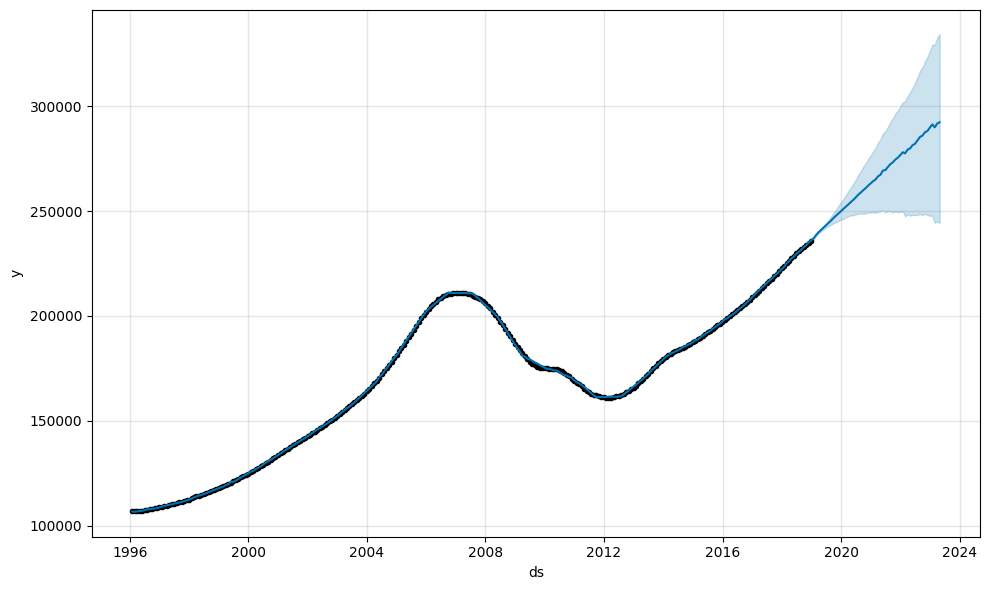

In [ ]:
df_pred = prophet.predict(df_future)
prophet.plot(df_pred)

In [ ]:
df_pred.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Christmas Day', 'Christmas Day_lower', 'Christmas Day_upper',
       'Christmas Day (Observed)', 'Christmas Day (Observed)_lower',
       'Christmas Day (Observed)_upper', 'Columbus Day', 'Columbus Day_lower',
       'Columbus Day_upper', 'Independence Day', 'Independence Day_lower',
       'Independence Day_upper', 'Independence Day (Observed)',
       'Independence Day (Observed)_lower',
       'Independence Day (Observed)_upper', 'Labor Day', 'Labor Day_lower',
       'Labor Day_upper', 'Martin Luther King Jr. Day',
       'Martin Luther King Jr. Day_lower', 'Martin Luther King Jr. Day_upper',
       'Memorial Day', 'Memorial Day_lower', 'Memorial Day_upper',
       'New Year's Day', 'New Year's Day_lower', 'New Year's Day_upper',
       'New Year's Day (Observed)', 'New Year's Day (Observed)_lower',
       'New Year's Day (Observed)_upper', 'Thanksgiving', 'Thanksgiving_lower',
       'Thanksgiv

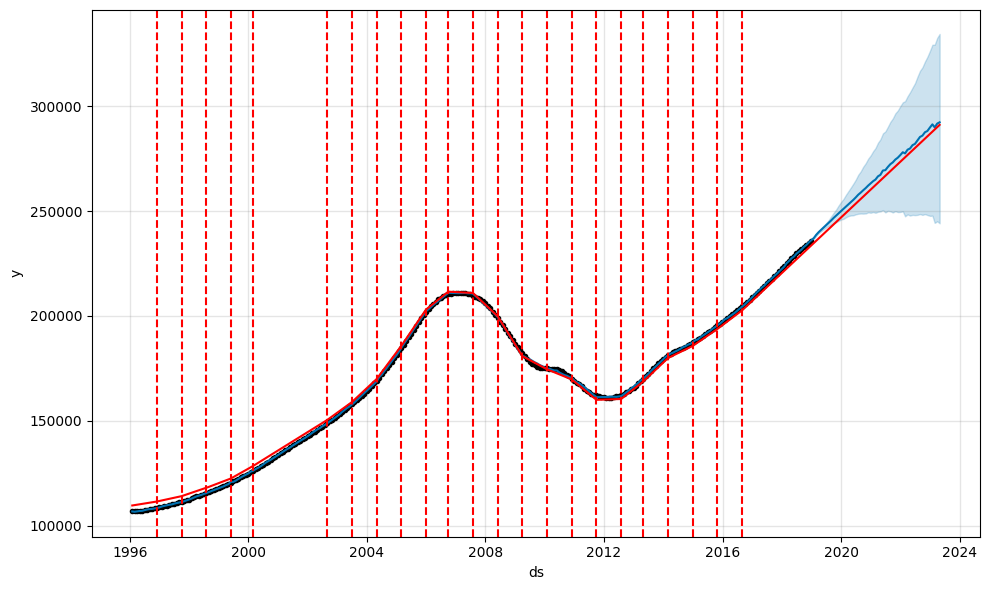

In [ ]:
fig = prophet.plot(df_pred)
a = add_changepoints_to_plot(
    fig.gca(), prophet, df_pred
)

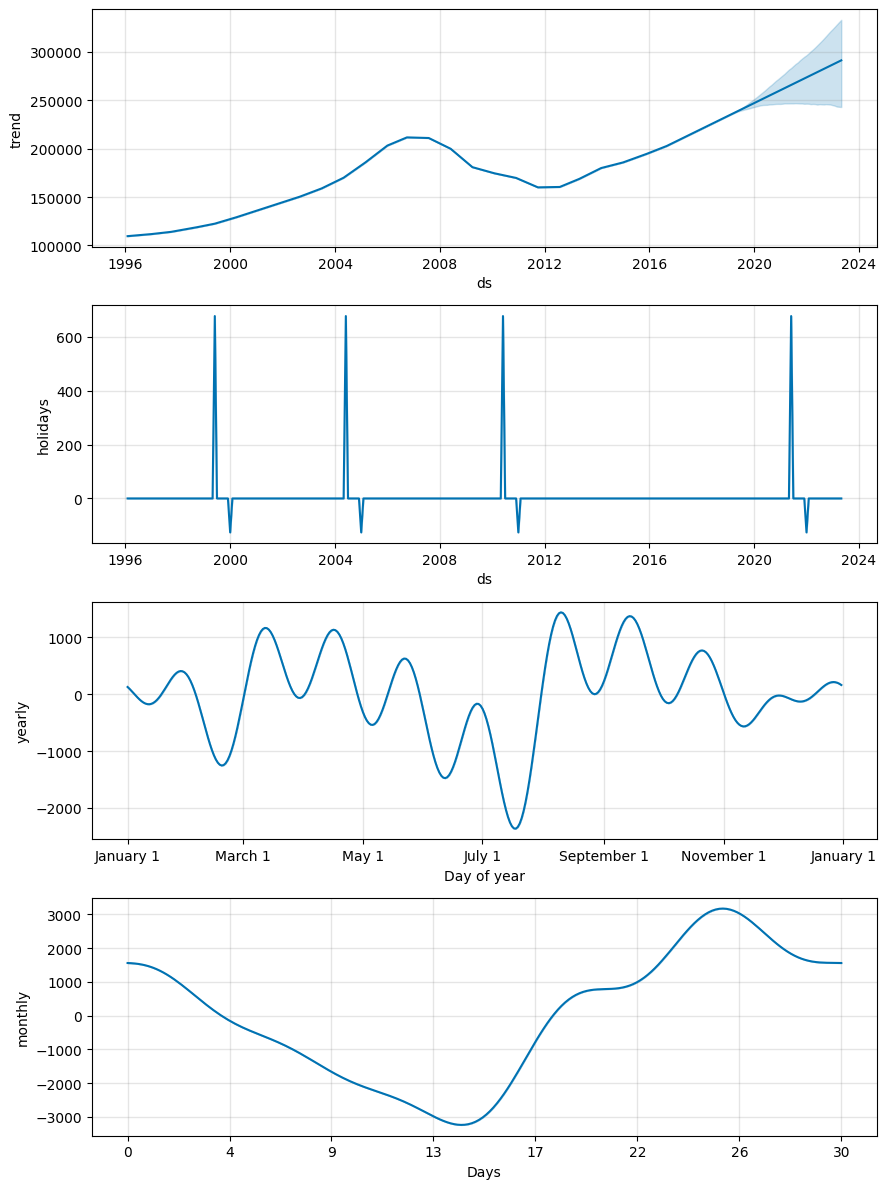

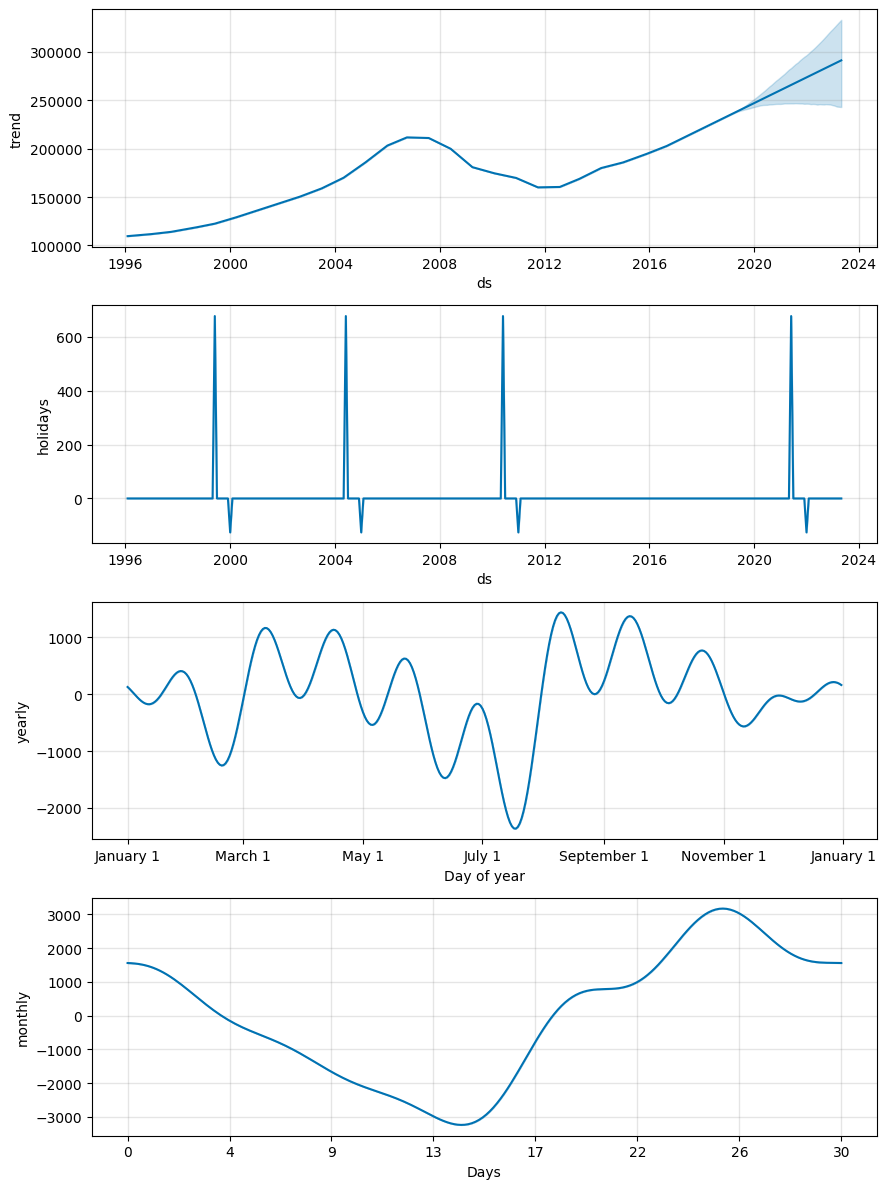

In [ ]:
prophet.plot_components(df_pred)

In [ ]:
SELECTED_COLS = [
    'ds','yhat','yhat_lower','yhat_upper'
]

df_pred = (
    df_pred.loc[:, SELECTED_COLS].reset_index(drop=True)
)
df_test = df_test.merge(df_pred, on=['ds'], how='left')
df_test['ds'] = pd.to_datetime(df_test['ds'])
df_test = df_test.set_index('ds')

[Text(0.5, 1.0, 'Gold Price - actual vs. predicted'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Gold Price ($)')]

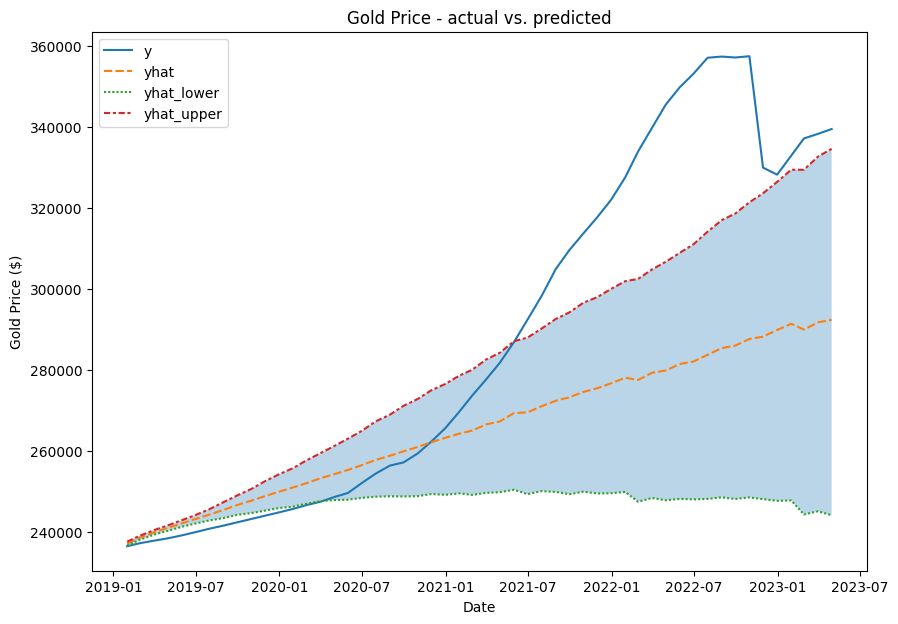

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,7))

PLOT_COLS = [
    'y','yhat','yhat_lower','yhat_upper'
]
ax = sns.lineplot(data=df_test[PLOT_COLS])
ax.fill_between(
    df_test.index,
    df_test['yhat_lower'],
    df_test['yhat_upper'],
    alpha=0.3
)
ax.set(
    title='Gold Price - actual vs. predicted',
    xlabel='Date',
    ylabel='Gold Price ($)'
)

In [ ]:
from prophet.diagnostics import (cross_validation, performance_metrics)
from prophet.plot import plot_cross_validation_metric

df_cv = cross_validation(
    prophet,
    initial='1056 days',
    period='90 days',
    horizon='90 days',
)

df_cv

In [ ]:
df_cv['ds'] = pd.to_datetime(df_cv['ds'])
df_cv2 = df_cv.set_index('ds')

[Text(0.5, 1.0, 'Prophet CV Gold Price - actual vs. predicted'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Gold Price ($)')]

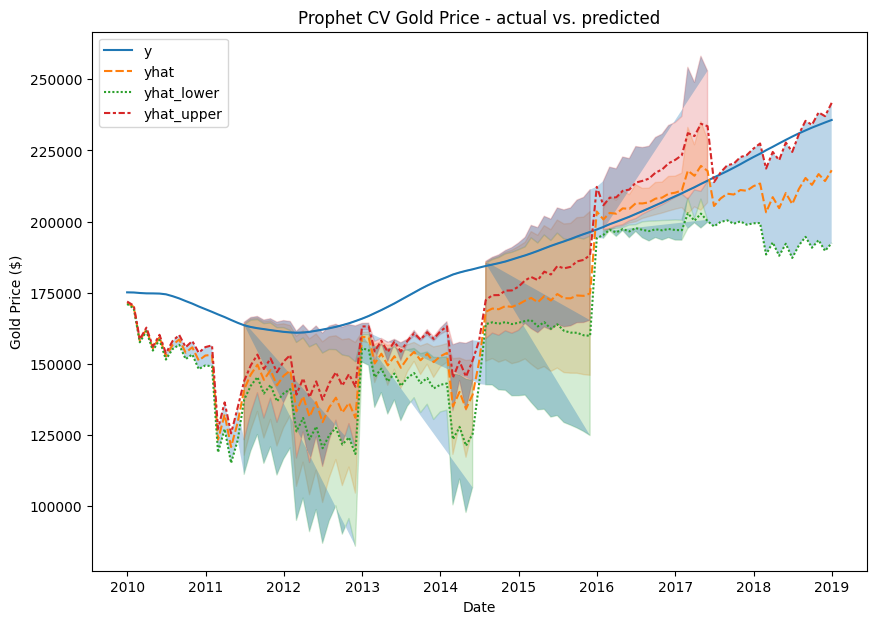

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

PLOT_COLS = [
    'y','yhat','yhat_lower','yhat_upper'
]
ax = sns.lineplot(data=df_cv2[PLOT_COLS])
'''
ax.fill_between(
    df_cv2.index,
    df_cv2['yhat_lower'],
    df_cv2['yhat_upper'],
    alpha=0.3
)
'''
ax.set(
    title='Prophet CV Gold Price - actual vs. predicted',
    xlabel='Date',
    ylabel='Gold Price ($)'
)

In [ ]:
df_p = performance_metrics(df_cv)
df_p

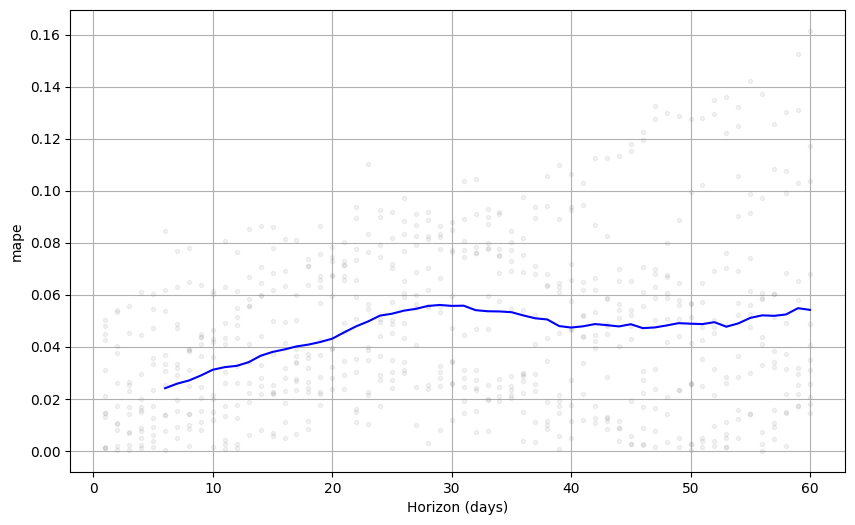

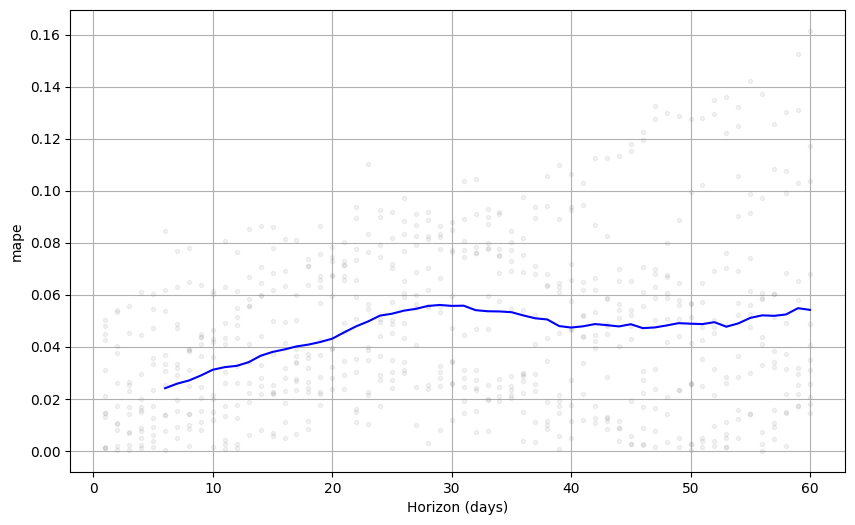

In [ ]:
plot_cross_validation_metric(df_cv, metric='mape')